In [1]:
import math
import numpy as np
import copy
import matplotlib.pyplot as plt

\begin{align}
E(x) = \int_{0}^{x} e^{-t^2} {\rm{d}}t.
\end{align}

In [2]:
def funce(t):
    return math.exp(-t**2)

In [7]:
def riemann(func,xValues):
    N = xValues.size
    a = xValues[0]
    h = xValues[1]-xValues[0]
    yValues = np.zeros(N)
    summ = 0
    
    for k in range(N):
        summ += func(a+(k*h))*h
        yValues[k] = summ
        
    print(summ)
    return yValues

0.892364915816932


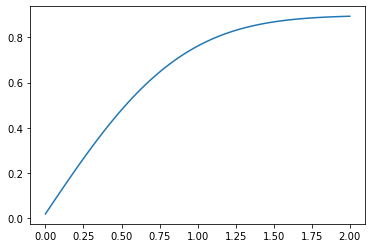

In [8]:
xValues_rie = np.linspace(0,2,100)
yValues_rie = riemann(funce,xValues_rie)
plt.plot(xValues_rie,yValues_rie);

In [9]:
def trape(func,xValues):
    N = xValues.size
    a = xValues[0]
    h = xValues[1]-xValues[0]
    yValues = np.zeros(N)
    summ = 0
    
    for k in range(N):
        summ += (func(a+k*h)+func(a+h*k+h))*h/2
        yValues[k] = summ
        
    print(summ)
    return yValues

0.8824344806174484


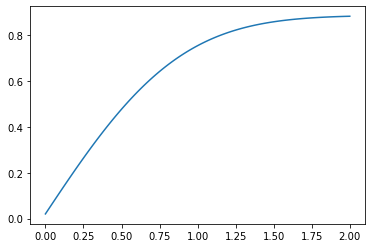

In [10]:
xValues_tra = np.linspace(0,2,100)
yValues_tra = trape(funce,xValues_tra)
plt.plot(xValues_tra,yValues_tra);

In [11]:
def simpson(func,xValues):
    N = xValues.size
    a = xValues[0]
    h = xValues[1]-xValues[0]
    yValues = np.zeros(N)
    summ = 0
    
    if N%2==0:
        for k in range(1,int(N/2)):
            summ += h/3*(func(a+(2*k-2)*h)+4*func(a+(2*k-1)*h)+func(a+2*k*h))
            yValues[2*k] = summ
            yValues[2*k+1] = summ
    elif N%2==1:
        for k in range(1,int((N-1)/2)):
            summ += h/3*(func(a+(2*k-2)*h)+4*func(a+(2*k-1)*h)+func(a+2*k*h))
            yValues[2*k] = summ
            yValues[2*k+1] = summ
        summ += h*func(N-1)
        yValues[N-1] = summ
            
    
    print(summ)
    return yValues

0.8816960696544186


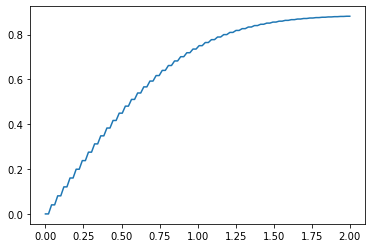

In [12]:
xValues_simp = np.linspace(0,2,100)
yValues_simp = simpson(funce,xValues_simp)
plt.plot(xValues_simp,yValues_simp);

In [13]:
def simpson2(func,a,b,N):
    h = (b-a)/N
    summ = 0
    
    if N%2==0:
        summ += (h/3)*(func(a)+func(a+N*h))
        for k in range(1,N,2):
            summ += 4*(h/3)*func(a+k*h)
        for k in range(2,N,2):
            summ += 2*(h/3)*func(a+k*h)
    elif N%2==1:
        summ += (h/3)*(func(a)+func(a+(N-1)*h))
        for k in range(1,N-1,2):
            summ += 4*(h/3)*func(a+k*h)
        for k in range(2,N-1,2):
            summ += 2*(h/3)*func(a+k*h)
        summ += h*func(a+N*h)
            
    return summ

0.8820660825612624


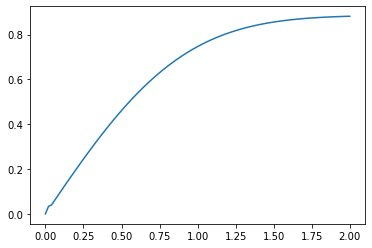

In [14]:
xValues_simp = np.linspace(0,2,100)
yValues_simp = np.zeros(xValues_simp.size)
for tt in range(1,xValues_simp.size):
    yValues_simp[tt] = simpson2(funce,0,xValues_simp[tt],tt)
print(yValues_simp[xValues_simp.size-1])
plt.plot(xValues_simp,yValues_simp);

In [16]:
def simpson(func,xValues):
    N = xValues.size
    a = xValues[0]
    h = xValues[1]-xValues[0]
    yValues = np.zeros(N)
    summ = 0
    
    for i in range(N):
        if(i == 0):
            summ += (h/3)*func(a)
        elif(i == N):
            summ += (h/3)*func(a+i*h)
        elif(i%2 == 0):
            summ += (2*h/3)*func(a+i*h)
        elif(i%2 == 1):
            summ += (4*h/3)*func(a+i*h)
        yValues[i] = summ
    
    
    print(summ)
    return yValues

0.8823230837117565


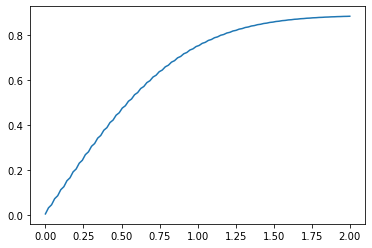

In [17]:
xValues_simp = np.linspace(0,2,100)
yValues_simp = simpson(funce,xValues_simp)
plt.plot(xValues_simp,yValues_simp);